In [2]:
import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score

import uproot 
import awkward as ak


In [3]:
file = "/home/dejavu/Projects/qgcal/Sample_Inspect/dijets_500GeV_cut.npy"
dijets = np.load(file)

In [4]:
dijets.shape

(72891436, 8)

In [5]:
dijets[0:2]

array([[ 2.50684850e+06, -3.06908041e-01,  5.00000000e+00,
         1.73553936e-02,  8.99036527e-02, -5.55102408e-01,
        -1.00000000e+00,  5.96492625e+05],
       [ 2.36345775e+06,  6.79327369e-01,  9.00000000e+00,
         1.04533024e-02,  1.15009025e-01, -5.77996612e-01,
        -1.00000000e+00,  5.96492625e+05]])

In [6]:
n_events = dijets.shape[0]//2
n_jets = dijets.shape[0]

In [7]:
dijets = dijets.reshape((dijets.shape[0]//2, 2, 8))

In [8]:
dijets[0, :, :]

array([[ 2.50684850e+06, -3.06908041e-01,  5.00000000e+00,
         1.73553936e-02,  8.99036527e-02, -5.55102408e-01,
        -1.00000000e+00,  5.96492625e+05],
       [ 2.36345775e+06,  6.79327369e-01,  9.00000000e+00,
         1.04533024e-02,  1.15009025e-01, -5.77996612e-01,
        -1.00000000e+00,  5.96492625e+05]])

In [9]:
forward_idx = np.argmax(dijets[:, :, 1], axis = 1)

In [10]:
leading_idx = np.zeros(dijets.shape[0])

In [12]:
central = ~forward_idx+2

In [13]:
leading_forward_idx = np.where(forward_idx == 0) # leading forward 
subleading_forward_idx = np.where(forward_idx == 1) # subleading forward 

leading_central_idx = np.where(central == 0) # leading central 
subleading_central_idx = np.where(central == 1) # subleading central 


In [14]:
leading_forward_idx[0]

array([       5,        6,       15, ..., 36445714, 36445716, 36445717])

In [15]:
leading_central_idx[0]

array([       0,        1,        2, ..., 36445712, 36445713, 36445715])

In [16]:
leading_forward_jets = dijets[leading_forward_idx[0], 0, :]

In [17]:
leading_central_jets = dijets[leading_central_idx[0], 0, :]

## Leading Forward Jets

In [19]:
leading_forward_gluon_idx = np.where(leading_forward_jets[:,-2] == 21)[0]
leading_forward_gluon = leading_forward_jets[leading_forward_gluon_idx]

leading_forward_quark_idx = np.where((leading_forward_jets[:,-2]==0) | (leading_forward_jets[:,-2]==1)| (leading_forward_jets[:,-2]==2))[0]
leading_forward_quark = leading_forward_jets[leading_forward_quark_idx]


In [20]:
leading_forward_gluon.shape

(6165534, 8)

In [21]:
leading_forward_quark.shape

(10903546, 8)

### Leading Forward Jets Distribution

In [22]:
user_bins = [500,600,800,1000,1200,1500,2000]
user_range = [(20, 2000), (-3, 3), (0, 100), (-0.1, 0.4), (-0.1, 0.5), (-1.0, 1.0)]
user_xlabel = ["Jet $p_{\mathrm{T}}$ [GeV]", "$\eta$", "Number of tracks", "$W_{jet}$", "$C_1$", "BDT Score"]
user_filename = ["dis_jetpt", "dis_eta", "dis_ntracks", "dis_width", "dis_c1", "dis_bdt"]
user_scale = [1e3, 1, 1, 1, 1, 1]


In [23]:
def draw_distribution_signal_bkg(
    variable_gluon, variable_quark, weight_gluon, weight_quark, 
    range=(0, 100), n_bins=100, density = False, 
    xlabel='xlabel', ylabel='Number of jets', save = False, 
    fig_name='figure', scale =1.0
    ):
    bins = np.linspace(range[0], range[1], n_bins)
    plt.hist(variable_gluon/scale, bins, weights = weight_gluon, density = density, alpha=0.5, label='gluon', color = 'blue')
    plt.hist(variable_quark/scale, bins, weights = weight_quark, density = density, alpha=0.5, label='quark', color = 'red')
    plt.legend(loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        if density:
            plt.savefig(fig_name+"_q_vs_g_norm")
        else:
            plt.savefig(fig_name+"_q_vs_g")
        plt.show()
    else:
        plt.show()
    

#### Whole PT range

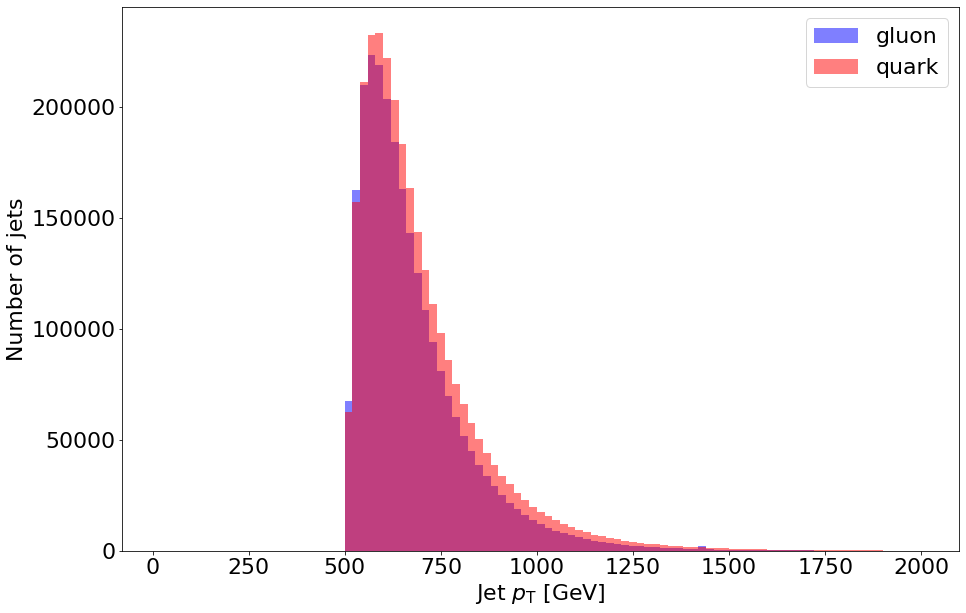

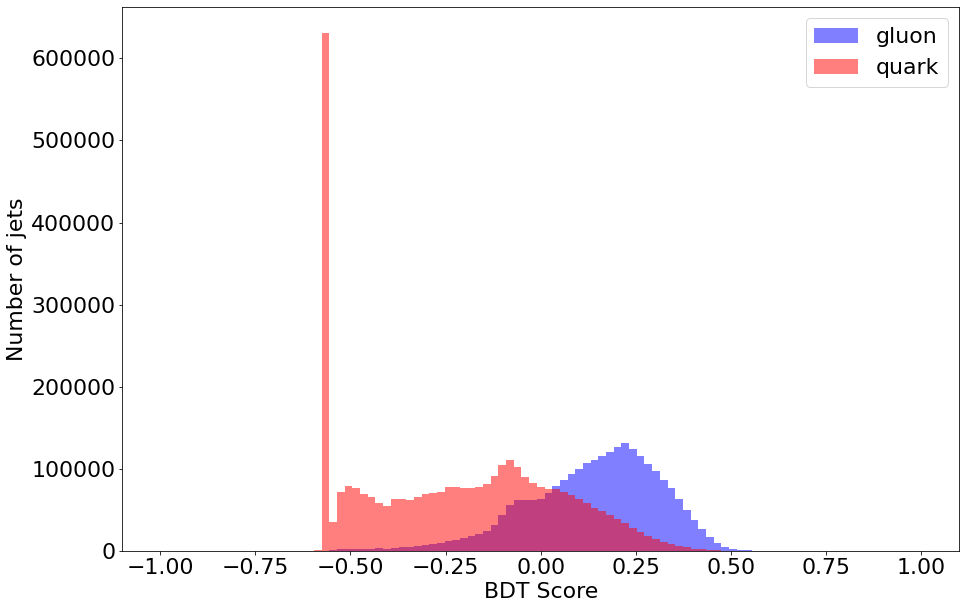

In [27]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.size"] = 22
for i in 0, 5:
    draw_distribution_signal_bkg(variable_gluon = leading_forward_gluon[:,i], variable_quark=leading_forward_quark[:,i], 
                                 weight_gluon=leading_forward_gluon[:,-1], weight_quark=leading_forward_quark[:,-1],
                                 range=user_range[i], xlabel=user_xlabel[i], scale=user_scale[i],
                                 fig_name=user_filename[i], density = False, save=False)

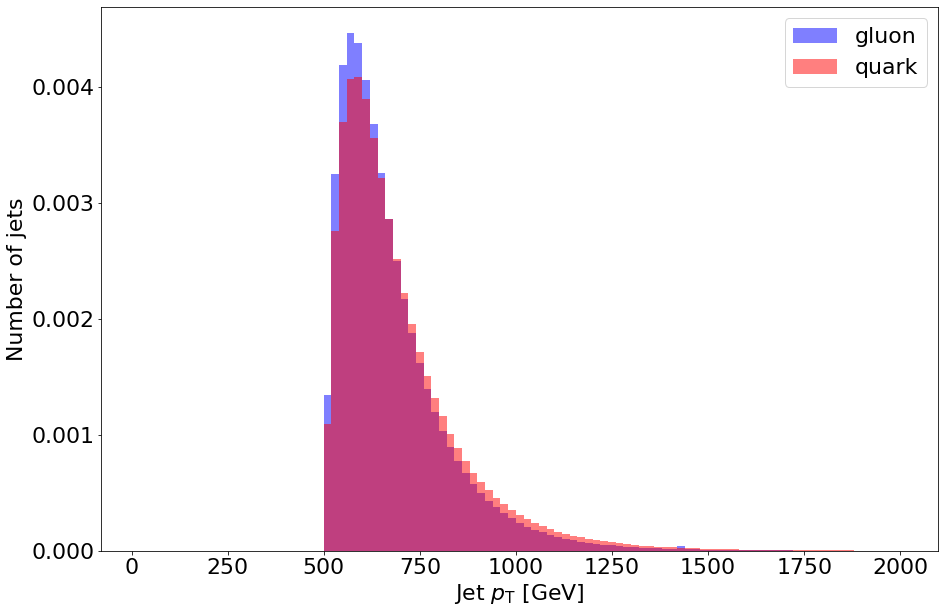

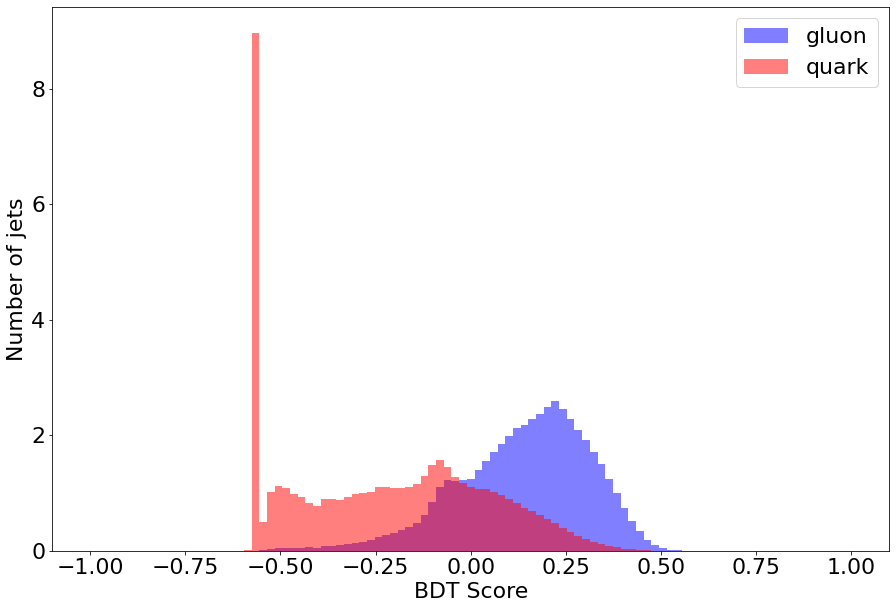

In [28]:
for i in 0, 5:
    draw_distribution_signal_bkg(variable_gluon = leading_forward_gluon[:,i], variable_quark=leading_forward_quark[:,i], 
                                 weight_gluon=leading_forward_gluon[:,-1], weight_quark=leading_forward_quark[:,-1],
                                 range=user_range[i], xlabel=user_xlabel[i], scale=user_scale[i],
                                 fig_name=user_filename[i], density = True, save=False)

In [47]:
features_name = ["jet_pt", "jet_eta", "jet_nTracks", "jet_trackWidth", "jet_trackC1", "jet_trackBDT", "jet_PartonTruthLabelID", "weight"]

In [42]:
leading_forward_quark[:,-1].argmax()

0

In [64]:
leading_forward_quark[0][:, np.newaxis].T.shape

(1, 8)

In [36]:
leading_forward_gluon[:,-1].argmax()

1

In [37]:
leading_forward_gluon[1]

array([1.43134000e+06, 7.09185421e-01, 1.00000000e+00, 2.73500323e-01,
       0.00000000e+00, 2.72180233e-02, 2.10000000e+01, 1.21728467e+03])

In [73]:
df = pd.DataFrame(leading_forward_quark[0][:, np.newaxis].T, columns=features_name)
df.loc[len(df)] = leading_forward_gluon[1].T

In [74]:
df

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,weight
0,2751357.25,0.168292,7.0,0.021723,0.073639,-0.556484,1.0,627040.875000
1,1431340.00,0.709185,1.0,0.273500,0.000000,0.027218,21.0,1217.284668


#### PT range

500


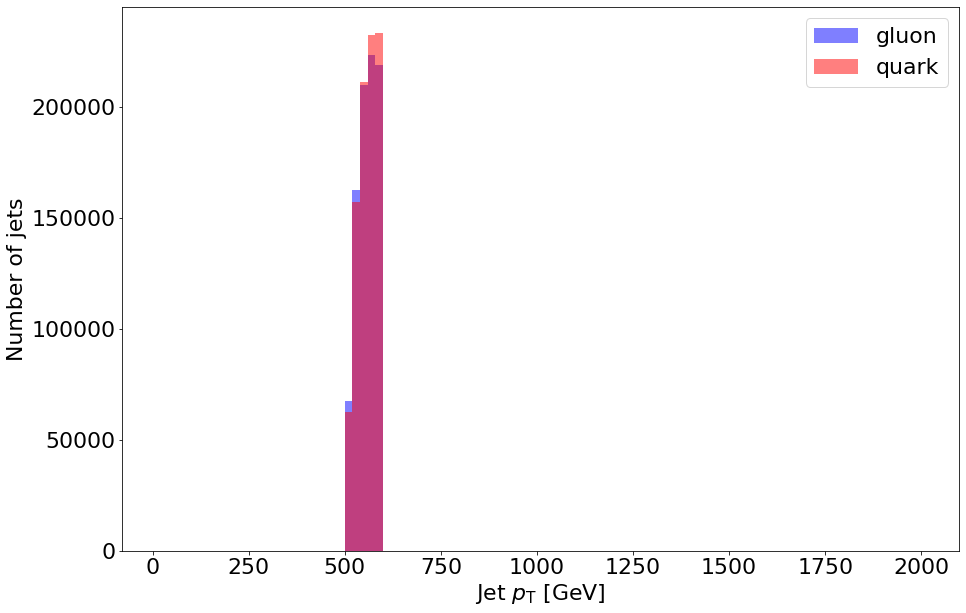

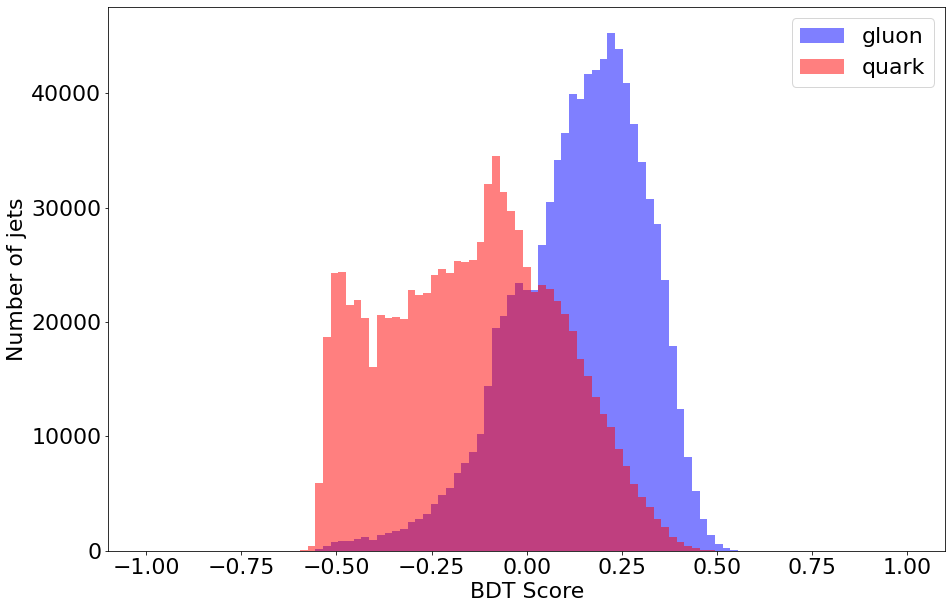

600


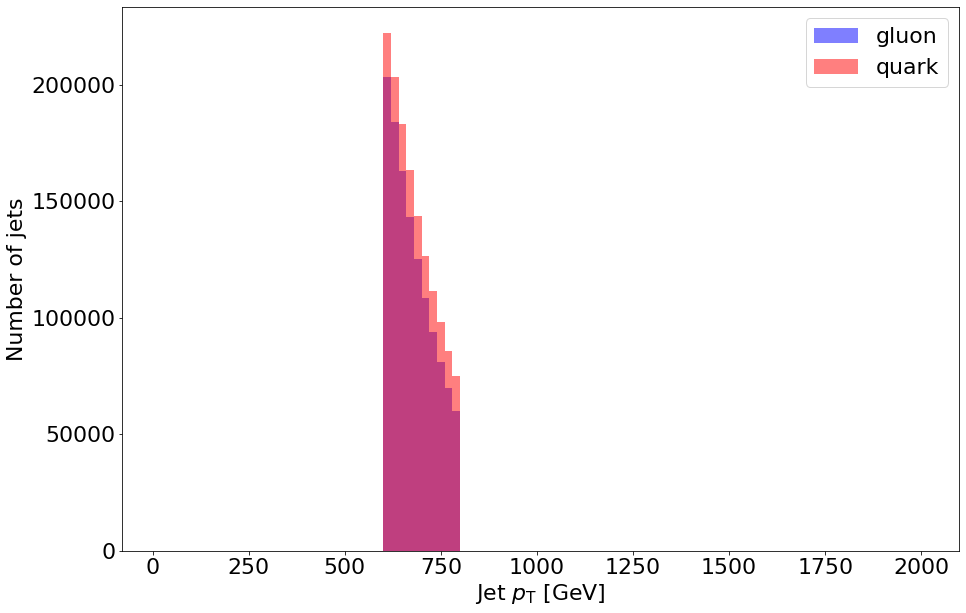

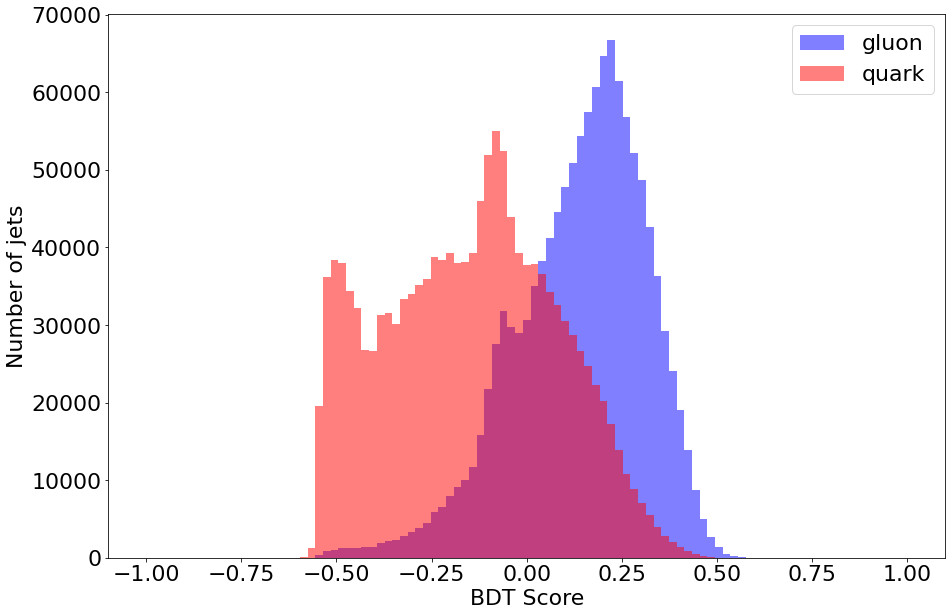

800


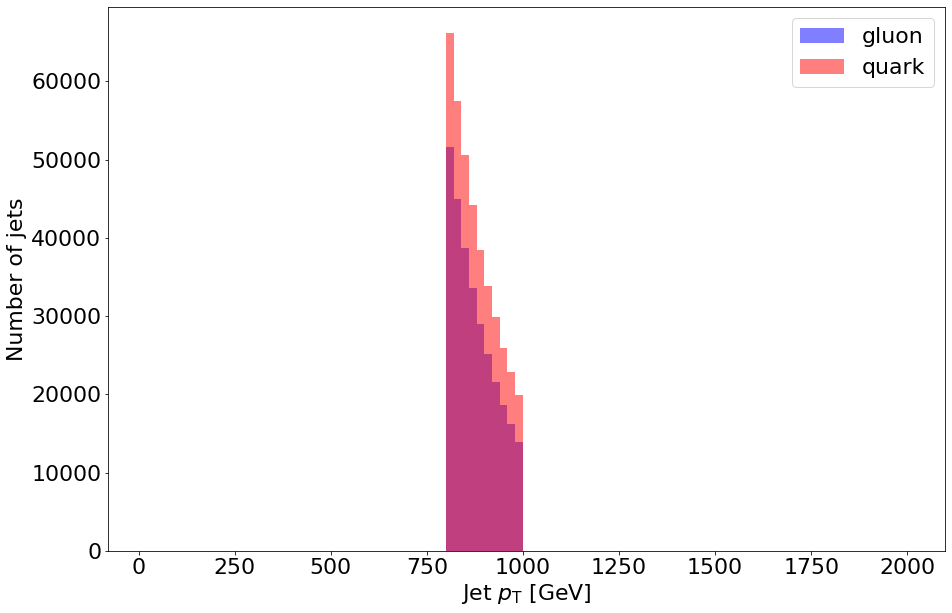

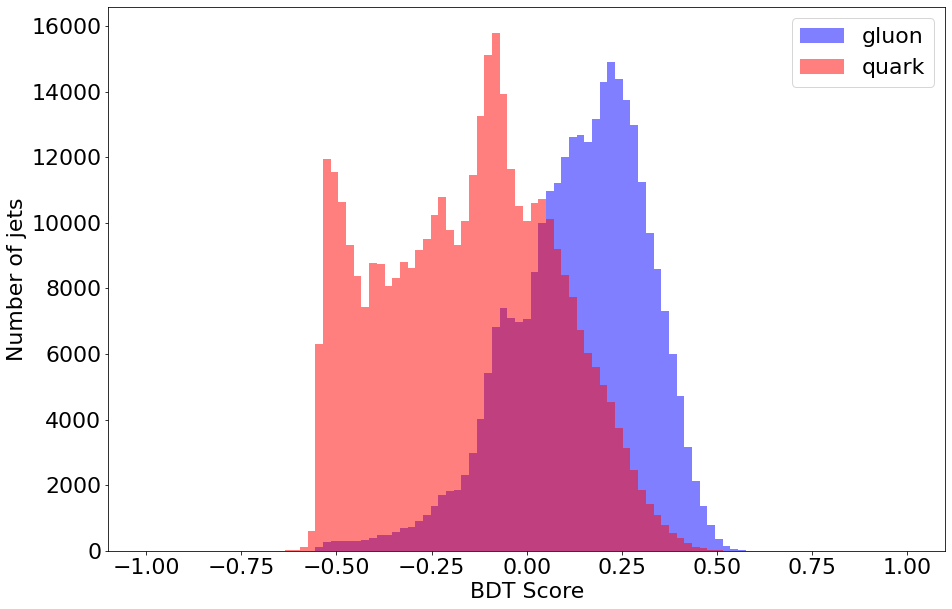

1000


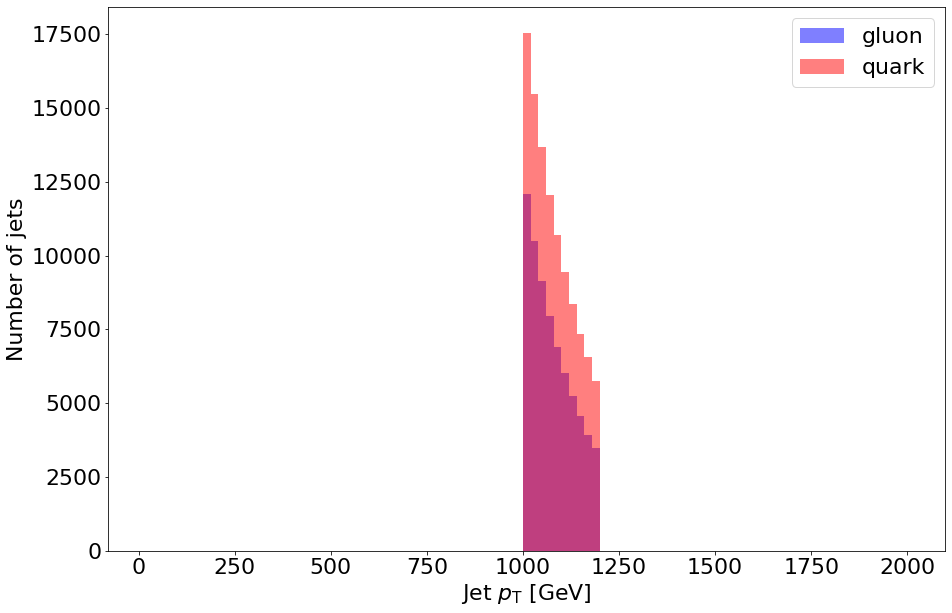

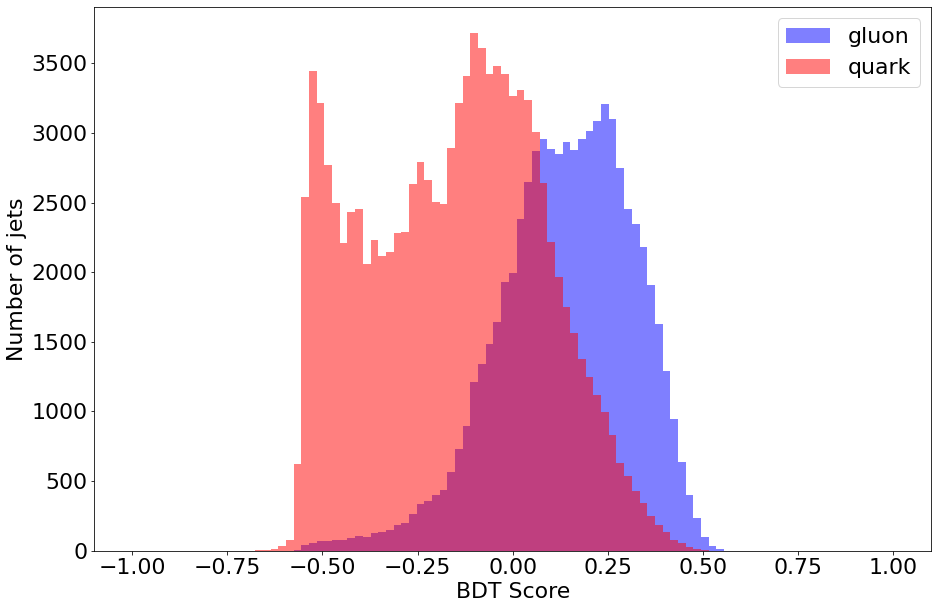

1200


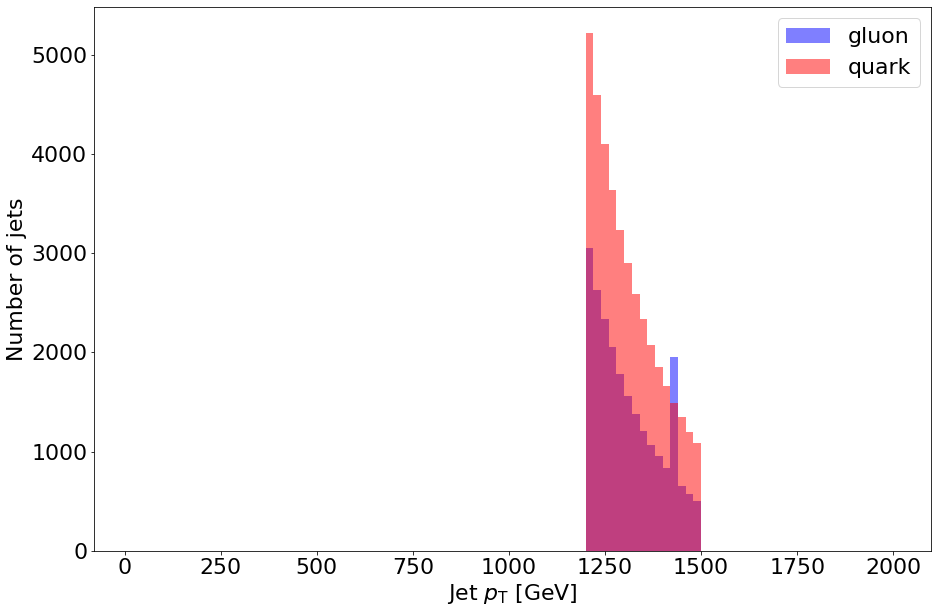

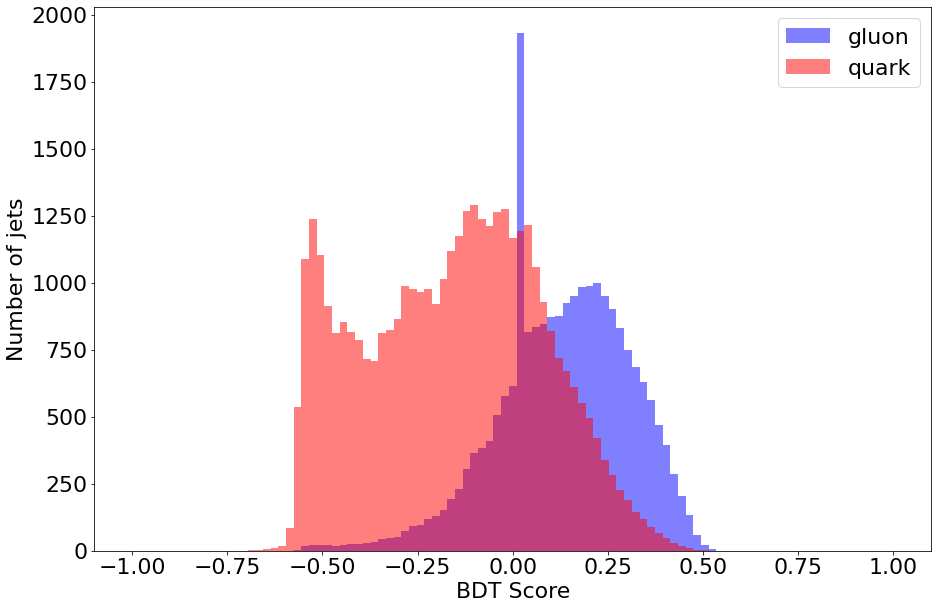

1500


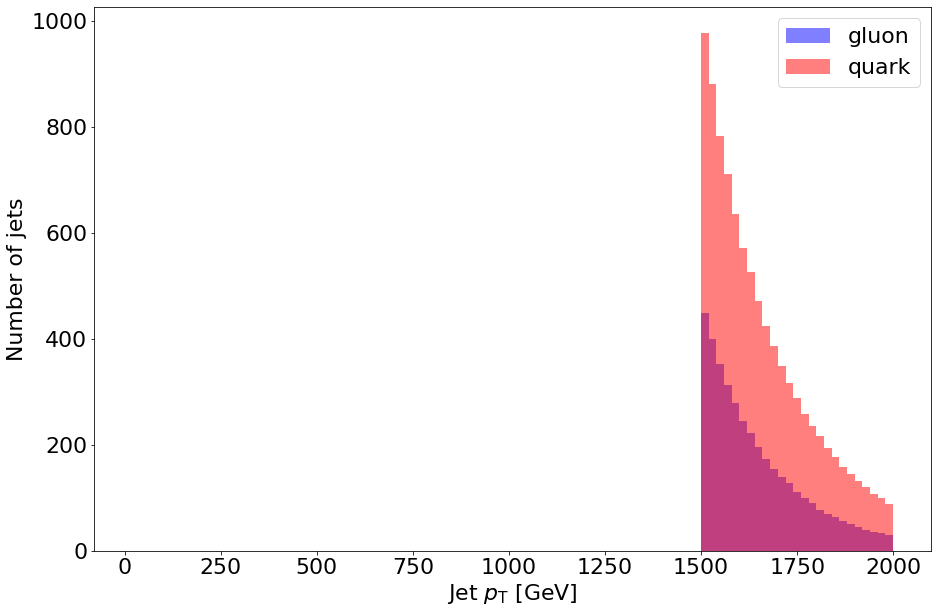

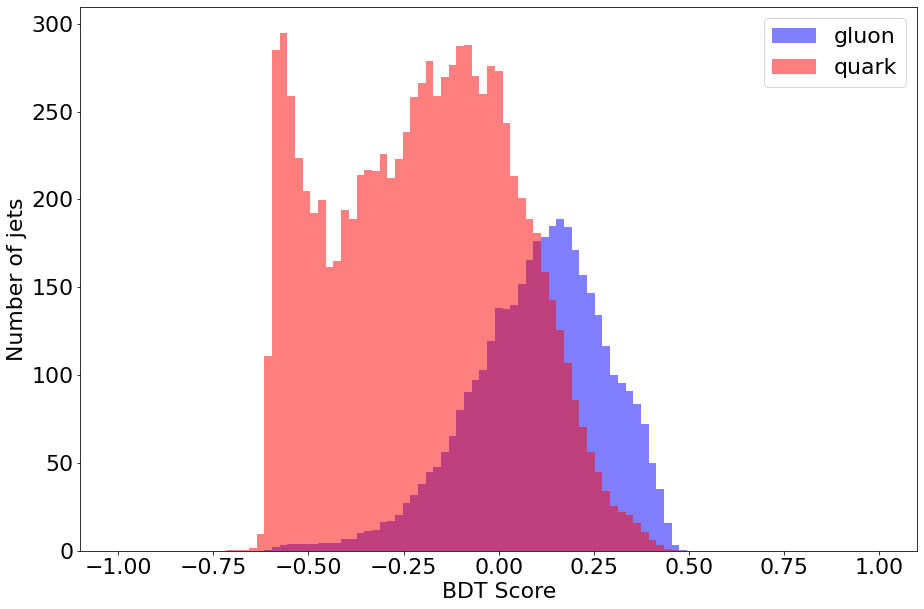

In [29]:
for i in range(len(user_bins)-1):
    print(user_bins[i])
    gluon_pt_selected_idx = np.where(np.logical_and(leading_forward_gluon[:,0] >user_bins[i]*1e3 ,leading_forward_gluon[:, 0]<user_bins[i+1]*1e3))
    quark_pt_selected_idx = np.where(np.logical_and(leading_forward_quark[:,0] >user_bins[i]*1e3 ,leading_forward_quark[:, 0]<user_bins[i+1]*1e3))
    leading_forward_gluon_sel = leading_forward_gluon[gluon_pt_selected_idx]
    leading_forward_quark_sel = leading_forward_quark[quark_pt_selected_idx]
    # Draw_ROC(X[X_selected_idx], y[X_selected_idx], user_bins[i:i+2])
    for i in 0, 5:
        draw_distribution_signal_bkg(variable_gluon = leading_forward_gluon_sel[:,i], variable_quark=leading_forward_quark_sel[:,i], 
                                 weight_gluon=leading_forward_gluon_sel[:,-1], weight_quark=leading_forward_quark_sel[:,-1],
                                 range=user_range[i], xlabel=user_xlabel[i], scale=user_scale[i],
                                 fig_name=user_filename[i], density = False, save=False)

# Draw ROC

In [38]:
X = np.concatenate((leading_forward_quark, leading_forward_gluon), axis=0)
y = np.concatenate((-1.0 * np.ones(leading_forward_quark.shape[0]), 1.0 * np.ones(leading_forward_gluon.shape[0])))

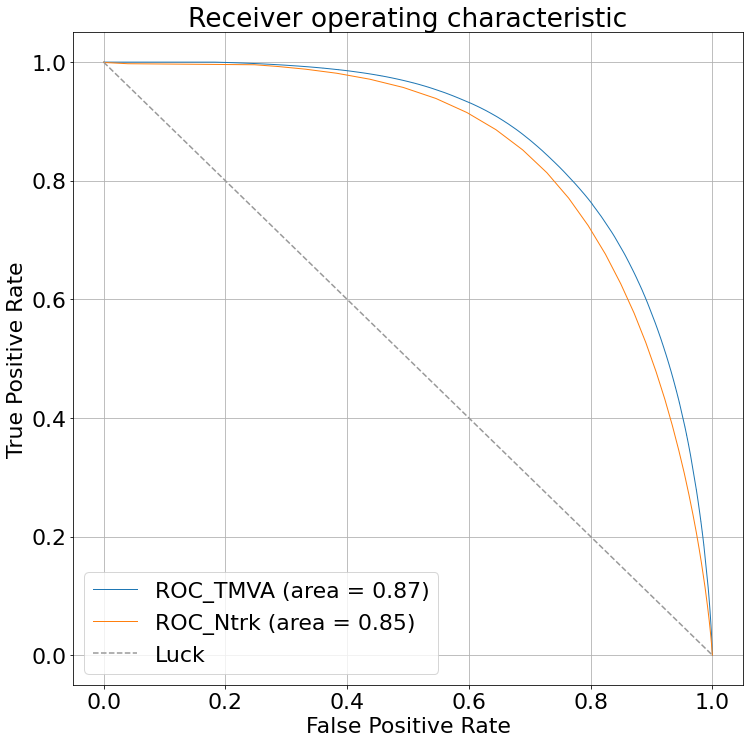

In [76]:
from sklearn.metrics import roc_curve, auc
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["font.size"] = 22

# Compute ROC curve and area under the curve
fpr_tmva, tpr_tmva, thresholds_tmva = roc_curve(y, X[:,5], sample_weight = X[:,-1])
fpr_ntrk, tpr_ntrk, thresholds_ntrk =  roc_curve(y, X[:,2], sample_weight = X[:,-1])

roc_auc_tmva = auc(fpr_tmva, tpr_tmva)
roc_auc_ntrk = auc(fpr_ntrk, tpr_ntrk)


# plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))
plt.plot(1-fpr_tmva, tpr_tmva, lw=1, label='ROC_TMVA (area = %0.2f)'%(roc_auc_tmva))
plt.plot(1-fpr_ntrk, tpr_ntrk, lw=1, label='ROC_Ntrk (area = %0.2f)'%(roc_auc_ntrk))

plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [78]:
pt_cut_2k = X[:,0]<2000 * 1e3
X_sel = X[pt_cut_2k]
y_sel = y[pt_cut_2k]

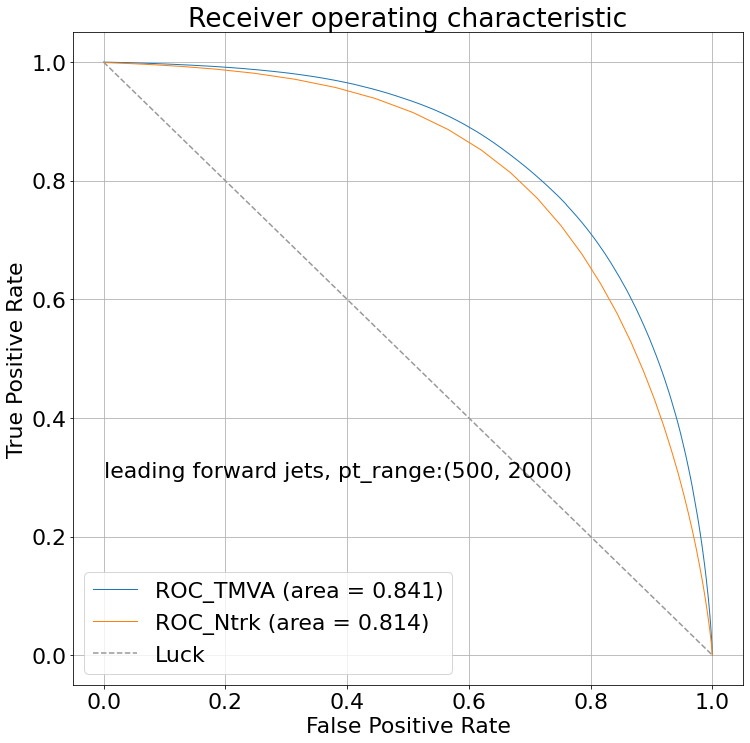

In [82]:
Draw_ROC(X_sel, y_sel, (user_bins[0], user_bins[-1]))

In [80]:
def Draw_ROC(X, y, pt_bins):
    # Compute ROC curve and area under the curve
    fpr_tmva, tpr_tmva, thresholds_tmva = roc_curve(y, X[:,5], sample_weight = X[:,-1])
    fpr_ntrk, tpr_ntrk, thresholds_ntrk =  roc_curve(y, X[:,2], sample_weight = X[:,-1])

    roc_auc_tmva = auc(fpr_tmva, tpr_tmva)
    roc_auc_ntrk = auc(fpr_ntrk, tpr_ntrk)


    # plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))
    plt.plot(1-fpr_tmva, tpr_tmva, lw=1, label='ROC_TMVA (area = %0.3f)'%(roc_auc_tmva))
    plt.plot(1-fpr_ntrk, tpr_ntrk, lw=1, label='ROC_Ntrk (area = %0.3f)'%(roc_auc_ntrk))

    plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower left")
    plt.grid()
    plt.text(0.0, 0.3, f"leading forward jets, pt_range:{pt_bins[0], pt_bins[1]}")
    plt.show()

500


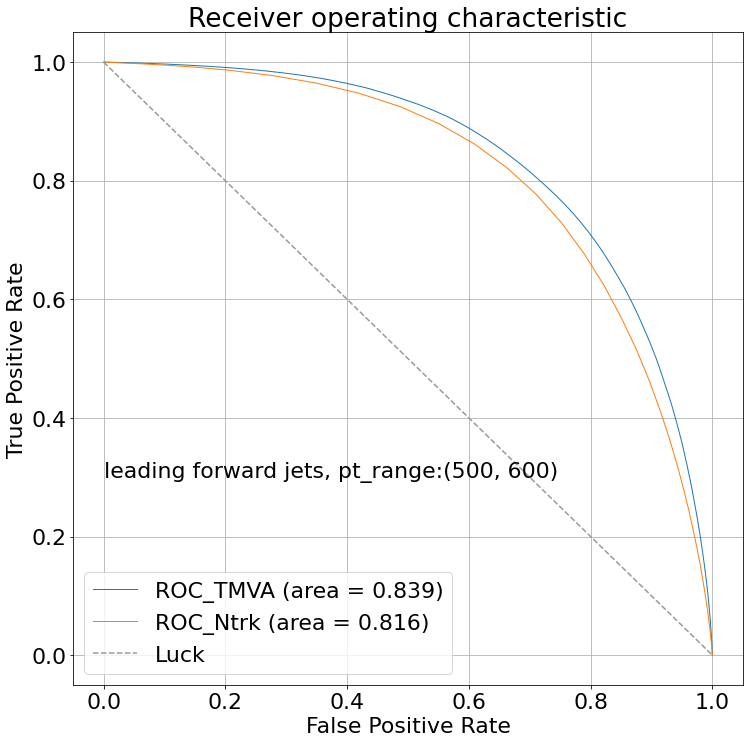

600


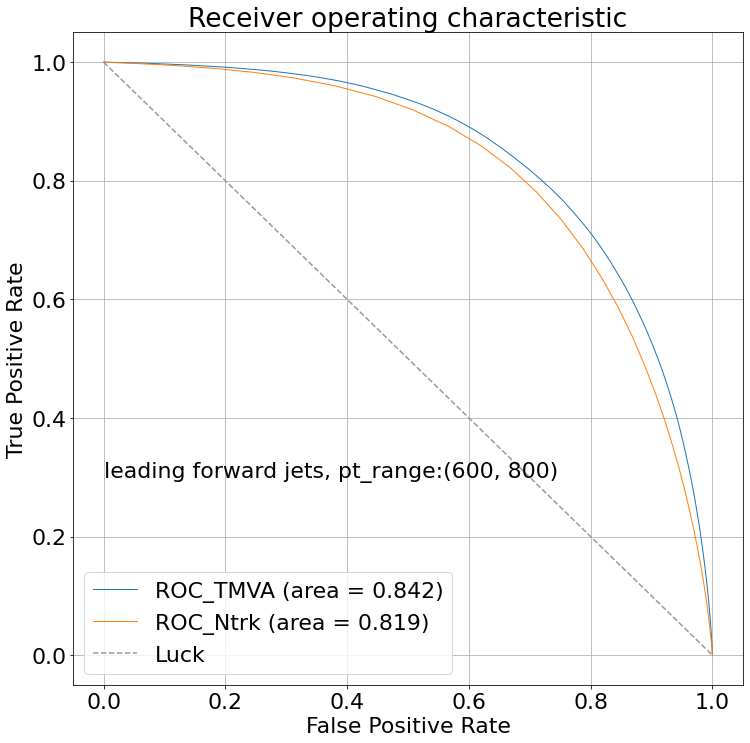

800


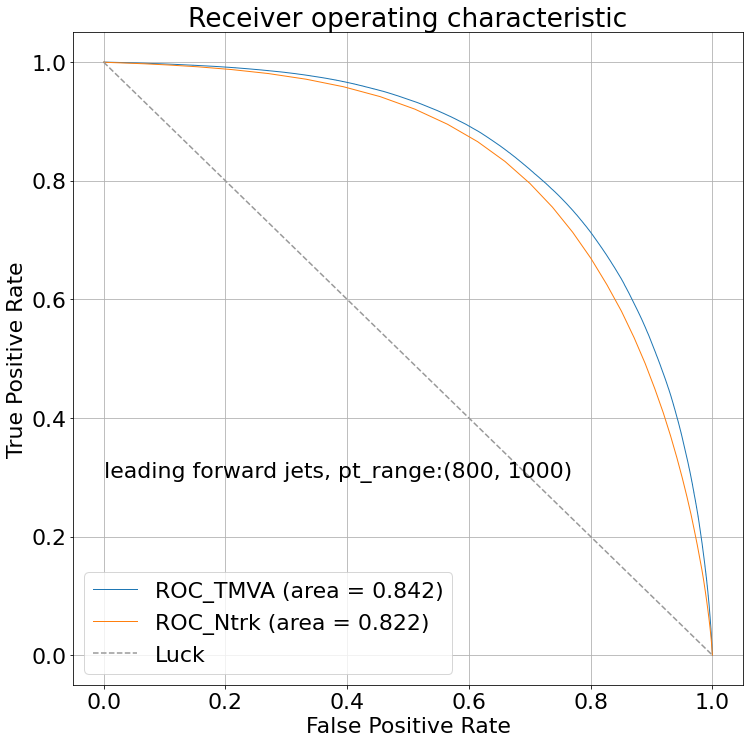

1000


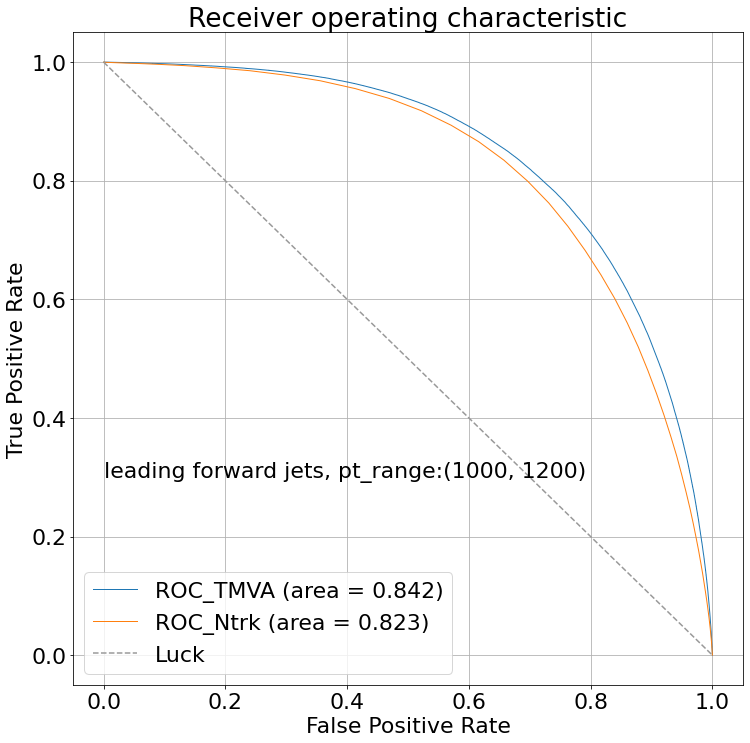

1200


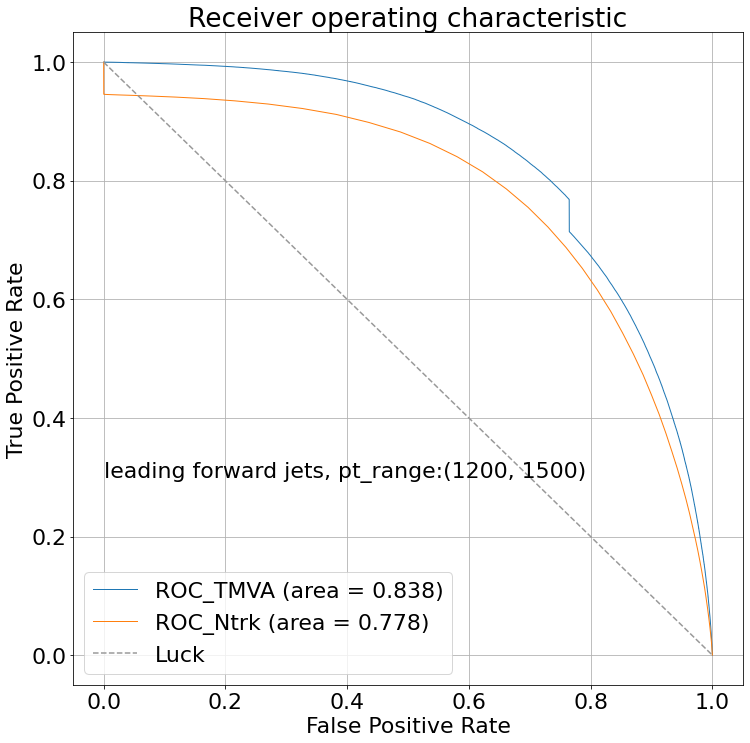

1500


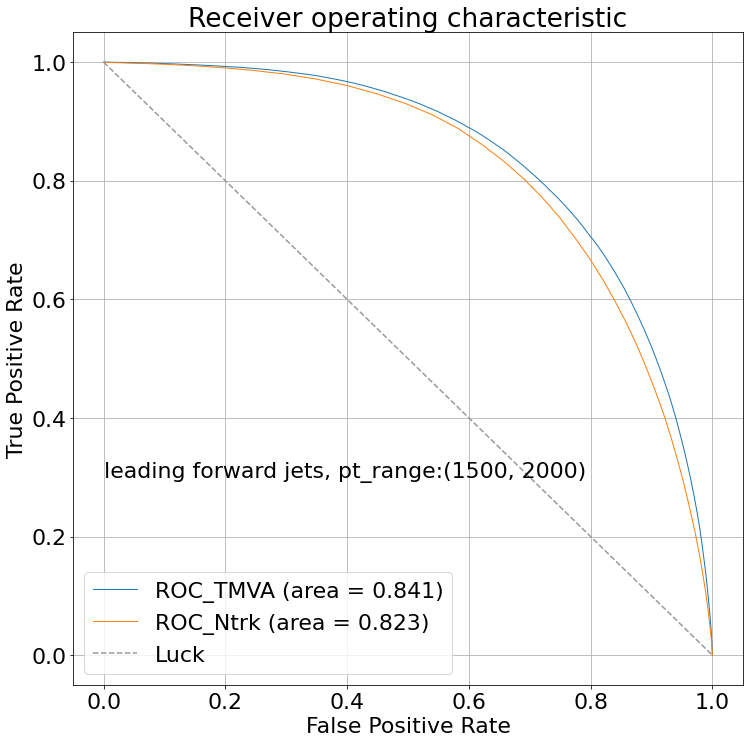

In [41]:
for i in range(len(user_bins)-1):
    print(user_bins[i])
    X_selected_idx = np.where(np.logical_and(X[:,0] >user_bins[i]*1e3 ,X[:, 0]<user_bins[i+1]*1e3))
    Draw_ROC(X[X_selected_idx], y[X_selected_idx], user_bins[i:i+2])